# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#be sure to include api_keys file with your api keys

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1700)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1700)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

646

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:

url = "http://api.openweathermap.org/data/2.5/weather?"


City_ID=[]
City=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
Max_Temp=[]
Min_Temp=[]
Wind_Speed=[]

for city in cities:

    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=imperial'
        weather_response= requests.get(query_url)
        weather_json = weather_response.json()
        weather_json
        City_ID.append(weather_json['id'])
        City.append(weather_json['name'])
        Cloudiness.append(weather_json['clouds']['all'])
        Country.append(weather_json['sys']['country'])
        Date.append(time.time())
        Humidity.append(weather_json['main']['humidity'])
        Lat.append(weather_json['coord']['lat'])
        Lng.append(weather_json['coord']['lon'])
        Max_Temp.append(weather_json['main']['temp_max'])
        Min_Temp.append(weather_json['main']['temp_min'])
        Wind_Speed.append(weather_json['wind']['speed'])
        print(weather_json['id'],weather_json['name'])
    except:
        continue








534313 Lomovka
2108857 Gizo Government Station
2270385 Camacha
2460954 Araouane
964432 Port Alfred
3985710 Cabo San Lucas
933995 Souillac
1507390 Dikson
1279306 Afzalpur
3393692 Itarema
2122090 Pevek
6185377 Yellowknife
4035715 Avarua
3389321 Santa Rita
1529376 Korla
2110227 Butaritari
1488632 Uglovskoye
2022572 Khatanga
692315 Sudak
3833367 Ushuaia
5122534 Jamestown
1485020 Znamenskoye
780687 Berlevåg
4030556 Rikitea
729730 Kyustendil
3440777 Rocha
1490256 Talnakh
1788852 Xining
2016216 Sosnovo-Ozerskoye
218680 Boende
1488920 Turochak
3831208 Qaanaaq
1015776 Bredasdorp
2075265 Busselton
110690 Faya
3874787 Punta Arenas
3366880 Hermanus
2155415 New Norfolk
4421935 Clarksdale
2112309 Katsuura
2191562 Dunedin
5106841 Albany
3395981 Maceió
5880054 Barrow
1254046 Tura
3372964 Lagoa
3652764 Puerto Ayora
2337680 Illela
2643044 Margate
315202 Eskişehir
2180815 Tuatapere
2206939 Bluff
1735106 George Town
2210554 Sirte
5866583 Saint Paul Harbor
6170031 Tuktoyaktuk
2194098 Ahipara
3419842 Sisimi

In [22]:
weather_json

{'coord': {'lon': -77.6139, 'lat': -11.0964},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 294.67,
  'feels_like': 294.94,
  'temp_min': 294.67,
  'temp_max': 294.67,
  'pressure': 1013,
  'humidity': 79,
  'sea_level': 1013,
  'grnd_level': 1007},
 'visibility': 10000,
 'wind': {'speed': 2.66, 'deg': 169, 'gust': 3.03},
 'clouds': {'all': 100},
 'dt': 1644546518,
 'sys': {'country': 'PE', 'sunrise': 1644491388, 'sunset': 1644536383},
 'timezone': -18000,
 'id': 3939761,
 'name': 'Hualmay',
 'cod': 200}

In [24]:
weather_df=pd.DataFrame({'City_ID':City_ID, 'City':City, 'Cloudiness':Cloudiness, 'Country':Country, 'Date':Date, 'Humidity':Humidity, 'Lat':Lat,
       'Lng':Lng, 'Max Temp':Max_Temp, 'Min Temp':Min_Temp, 'Wind Speed':Wind_Speed})
weather_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Min Temp,Wind Speed
0,534313,Lomovka,100,RU,1.644555e+09,93,53.9194,58.3672,4.12,4.12,4.63
1,2108857,Gizo Government Station,74,SB,1.644555e+09,80,-8.1030,156.8419,80.91,80.91,7.83
2,2270385,Camacha,40,PT,1.644555e+09,94,33.0833,-16.3333,61.56,60.22,8.05
3,2460954,Araouane,26,ML,1.644555e+09,26,18.9048,-3.5265,58.26,58.26,14.20
4,964432,Port Alfred,3,ZA,1.644555e+09,82,-33.5906,26.8910,68.85,68.85,4.59
...,...,...,...,...,...,...,...,...,...,...,...
588,2511150,Santa Lucía,0,ES,1.644555e+09,45,27.9117,-15.5407,61.77,57.94,4.61
589,3356832,Henties Bay,83,NA,1.644555e+09,89,-22.1160,14.2845,71.85,71.85,8.28
590,3526934,Hueyapan,11,MX,1.644555e+09,50,18.8667,-98.6667,56.08,56.08,2.06
591,2088122,Port Moresby,20,PG,1.644555e+09,55,-9.4431,147.1797,89.02,89.02,17.27


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:


weather_df.to_csv('../output_data/city_data.csv')

In [49]:
weather_json

{'cod': '404', 'message': 'city not found'}

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#no such cities were found 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

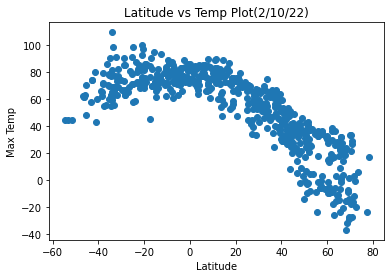

In [110]:
plt.scatter(weather_df['Lat'],weather_df['Max Temp'])

plt.title('Latitude vs Temp Plot(2/10/22)')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.savefig('../output_data/fig1.png')

## Latitude vs. Humidity Plot

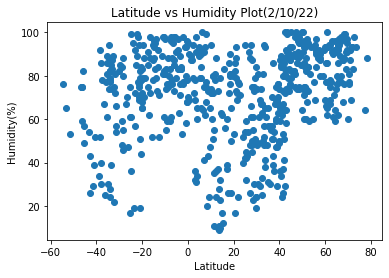

In [111]:
plt.scatter(weather_df['Lat'],weather_df['Humidity'])

plt.title('Latitude vs Humidity Plot(2/10/22)')
plt.ylabel('Humidity(%)')
plt.xlabel('Latitude')
plt.savefig('../output_data/fig2.png')

## Latitude vs. Cloudiness Plot

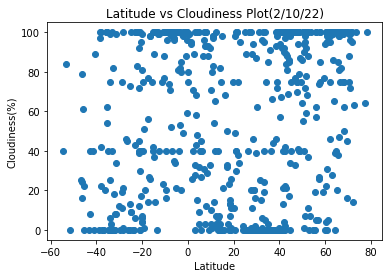

In [112]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'])

plt.title('Latitude vs Cloudiness Plot(2/10/22)')
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.savefig('../output_data/fig3.png')

## Latitude vs. Wind Speed Plot

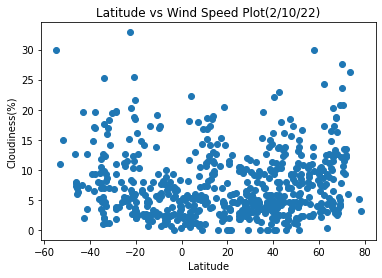

In [113]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'])

plt.title('Latitude vs Wind Speed Plot(2/10/22)')
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.savefig('../output_data/fig4.png')

In [114]:
southern_df=weather_df[weather_df['Lat']<0]
southern_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Min Temp,Wind Speed
1,2108857,Gizo Government Station,74,SB,1.644555e+09,80,-8.1030,156.8419,80.91,80.91,7.83
4,964432,Port Alfred,3,ZA,1.644555e+09,82,-33.5906,26.8910,68.85,68.85,4.59
6,933995,Souillac,40,MU,1.644555e+09,78,-20.5167,57.5167,83.35,80.98,3.44
9,3393692,Itarema,80,BR,1.644555e+09,83,-2.9248,-39.9167,76.41,76.41,6.42
12,4035715,Avarua,12,CK,1.644555e+09,69,-21.2078,-159.7750,82.45,82.45,8.05
...,...,...,...,...,...,...,...,...,...,...,...
579,2139521,Noumea,100,NC,1.644555e+09,99,-22.2763,166.4572,84.99,82.38,20.33
585,3887127,Iquique,6,CL,1.644555e+09,68,-20.2208,-70.1431,68.04,68.04,3.62
589,3356832,Henties Bay,83,NA,1.644555e+09,89,-22.1160,14.2845,71.85,71.85,8.28
591,2088122,Port Moresby,20,PG,1.644555e+09,55,-9.4431,147.1797,89.02,89.02,17.27


In [115]:
northern_df=weather_df[weather_df['Lat']>0]
northern_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Min Temp,Wind Speed
0,534313,Lomovka,100,RU,1.644555e+09,93,53.9194,58.3672,4.12,4.12,4.63
2,2270385,Camacha,40,PT,1.644555e+09,94,33.0833,-16.3333,61.56,60.22,8.05
3,2460954,Araouane,26,ML,1.644555e+09,26,18.9048,-3.5265,58.26,58.26,14.20
5,3985710,Cabo San Lucas,95,MX,1.644555e+09,71,22.8909,-109.9124,68.50,55.51,4.70
7,1507390,Dikson,100,RU,1.644555e+09,93,73.5069,80.5464,5.76,5.76,26.19
...,...,...,...,...,...,...,...,...,...,...,...
584,1160939,Iranshahr,0,IR,1.644555e+09,26,27.2025,60.6848,57.54,57.54,4.61
586,3674676,Mitú,94,CO,1.644555e+09,87,1.1983,-70.1733,74.17,74.17,2.33
587,1177042,Hasilpur,0,PK,1.644555e+09,24,29.7122,72.5553,66.18,66.18,2.98
588,2511150,Santa Lucía,0,ES,1.644555e+09,45,27.9117,-15.5407,61.77,57.94,4.61


## Linear Regression

In [116]:

slope, intercept, rvalue, pvalue, stderr = linregress(northern_df['Lat'],northern_df['Max Temp'])
linregress(northern_df['Lat'],northern_df['Max Temp'])

LinregressResult(slope=-1.2613471582265412, intercept=90.02452391926269, rvalue=-0.8723285899922221, pvalue=4.63520251194351e-126, stderr=0.03539206807751735, intercept_stderr=1.5285462126096168)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R value: -0.8723285899922221


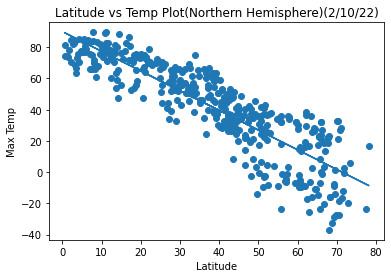

In [117]:

plt.scatter(northern_df['Lat'],northern_df['Max Temp'])

plt.title('Latitude vs Temp Plot(Northern Hemisphere)(2/10/22)')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.plot(northern_df['Lat'],slope*northern_df['Lat']+intercept)

print('R value:',rvalue)
plt.savefig('../output_data/fig5.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [118]:

slope, intercept, rvalue, pvalue, stderr = linregress(southern_df['Lat'],southern_df['Max Temp'])
linregress(southern_df['Lat'],southern_df['Max Temp'])

LinregressResult(slope=0.3106130739396467, intercept=80.7450067272263, rvalue=0.379477310825125, pvalue=5.6901321836427057e-08, stderr=0.05494057882978192, intercept_stderr=1.3758079188203196)

R value: 0.379477310825125


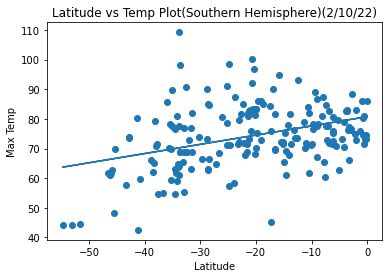

In [119]:
plt.scatter(southern_df['Lat'],southern_df['Max Temp'])

plt.title('Latitude vs Temp Plot(Southern Hemisphere)(2/10/22)')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.plot(southern_df['Lat'],slope*southern_df['Lat']+intercept)

print('R value:',rvalue)
plt.savefig('../output_data/fig6.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [120]:
slope, intercept, rvalue, pvalue, stderr = linregress(northern_df['Lat'],northern_df['Humidity'])
linregress(northern_df['Lat'],northern_df['Humidity'])


LinregressResult(slope=0.4318509170853921, intercept=54.41764078863524, rvalue=0.3970405818468643, pvalue=1.3596029689957572e-16, stderr=0.04997594928948552, intercept_stderr=2.158408710129604)

R value: 0.3970405818468643


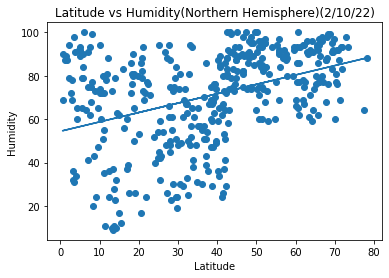

In [121]:

plt.scatter(northern_df['Lat'],northern_df['Humidity'])

plt.title('Latitude vs Humidity(Northern Hemisphere)(2/10/22)')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.plot(northern_df['Lat'],slope*northern_df['Lat']+intercept)

print('R value:',rvalue)
plt.savefig('../output_data/fig7.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [122]:
slope, intercept, rvalue, pvalue, stderr = linregress(southern_df['Lat'],southern_df['Humidity'])
linregress(southern_df['Lat'],southern_df['Humidity'])



LinregressResult(slope=0.5421670028091309, intercept=84.88601024952919, rvalue=0.3818233526201651, pvalue=4.6391567498479585e-08, stderr=0.09520863887187235, intercept_stderr=2.3841903760398737)

R value: 0.3818233526201651


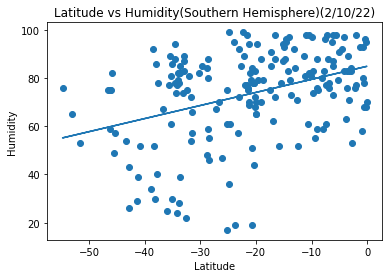

In [123]:
plt.scatter(southern_df['Lat'],southern_df['Humidity'])

plt.title('Latitude vs Humidity(Southern Hemisphere)(2/10/22)')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.plot(southern_df['Lat'],slope*southern_df['Lat']+intercept)

print('R value:',rvalue)
plt.savefig('../output_data/fig8.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [124]:
slope, intercept, rvalue, pvalue, stderr = linregress(northern_df['Lat'],northern_df['Cloudiness'])
linregress(northern_df['Lat'],northern_df['Cloudiness'])

LinregressResult(slope=0.6159997837564791, intercept=30.849485899343875, rvalue=0.30484313756841497, pvalue=4.5343132866999747e-10, stderr=0.0963470116900444, intercept_stderr=4.161126145341729)

R value: 0.30484313756841497


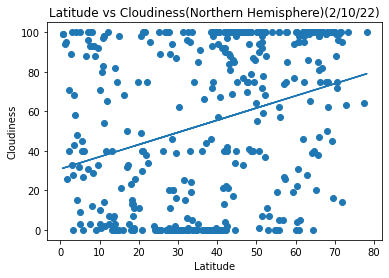

In [125]:

plt.scatter(northern_df['Lat'],northern_df['Cloudiness'])

plt.title('Latitude vs Cloudiness(Northern Hemisphere)(2/10/22)')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.plot(northern_df['Lat'],slope*northern_df['Lat']+intercept)

print('R value:',rvalue)
plt.savefig('../output_data/fig9.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [126]:
slope, intercept, rvalue, pvalue, stderr = linregress(southern_df['Lat'],southern_df['Cloudiness'])
linregress(southern_df['Lat'],southern_df['Cloudiness'])

LinregressResult(slope=1.3643900013929953, intercept=82.82201927579338, rvalue=0.46042222904672403, pvalue=1.8255010276072633e-11, stderr=0.19084100140466864, intercept_stderr=4.778991531589313)

R value: 0.46042222904672403


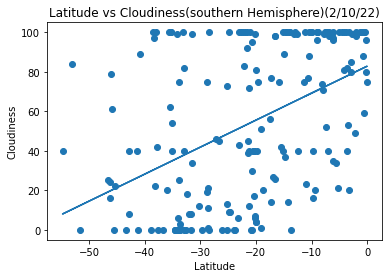

In [127]:

plt.scatter(southern_df['Lat'],southern_df['Cloudiness'])

plt.title('Latitude vs Cloudiness(southern Hemisphere)(2/10/22)')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.plot(southern_df['Lat'],slope*southern_df['Lat']+intercept)

print('R value:',rvalue)
plt.savefig('../output_data/fig10.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [128]:
slope, intercept, rvalue, pvalue, stderr = linregress(northern_df['Wind Speed'],northern_df['Lat'])
linregress(northern_df['Wind Speed'],northern_df['Lat'])

LinregressResult(slope=0.7172544287041221, intercept=32.87514283585598, rvalue=0.19098571662092756, pvalue=0.00011907388903955282, stderr=0.1845513698889651, intercept_stderr=1.6925653196246693)

R value: 0.19098571662092756


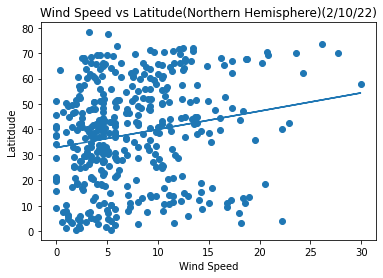

In [129]:
plt.scatter(northern_df['Wind Speed'],northern_df['Lat'])

plt.title('Wind Speed vs Latitude(Northern Hemisphere)(2/10/22)')
plt.ylabel('Latitdude')
plt.xlabel('Wind Speed')
plt.plot(northern_df['Wind Speed'],slope*northern_df['Wind Speed']+intercept)

print('R value:',rvalue)
plt.savefig('../output_data/fig11.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [130]:
slope, intercept, rvalue, pvalue, stderr = linregress(southern_df['Wind Speed'],southern_df['Lat'])
linregress(southern_df['Wind Speed'],southern_df['Lat'])

LinregressResult(slope=-0.7446677755932549, intercept=-15.430352709264806, rvalue=-0.3292137169196358, pvalue=3.122914409181344e-06, stderr=0.154952052025612, intercept_stderr=1.509535998901647)

R value: -0.3292137169196358


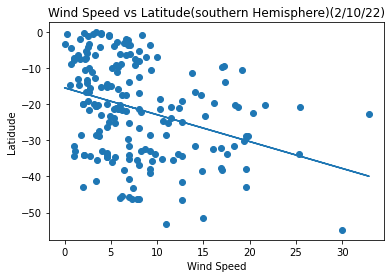

In [131]:
plt.scatter(southern_df['Wind Speed'],southern_df['Lat'])

plt.title('Wind Speed vs Latitude(southern Hemisphere)(2/10/22)')
plt.ylabel('Latidude')
plt.xlabel('Wind Speed')
plt.plot(southern_df['Wind Speed'],slope*southern_df['Wind Speed']+intercept)

print('R value:',rvalue)
plt.savefig('../output_data/fig12.png')